In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans 

In [5]:
df = pd.read_csv('clean_combined_dataset4.csv')

C:\Users\tanya\AppData\Local\Temp\ipykernel_3496\3066812137.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_combined_dataset4.csv')


In [118]:
df.drop('sku',axis=1, inplace=True)
df.drop('WcMakeText', axis=1, inplace=True)
df.drop('GP%', axis=1, inplace=True) 
df.drop('tempmax',axis=1, inplace=True)
df.drop('tempmin',axis=1, inplace=True)
df.drop('preciptype',axis=1, inplace=True)
df.drop('snowdepth',axis=1, inplace=True) 
df.drop('conditions',axis=1, inplace=True)
df.drop('datetime', axis=1, inplace=True) 

In [119]:
df.drop('Date', axis=1, inplace=True)

df.drop('ZIP', axis=1, inplace=True)

df.drop('STREET', axis=1, inplace=True) 
df.drop('CITY', axis=1, inplace=True)


In [120]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184194 entries, 0 to 184193
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store#           184194 non-null  int64  
 1   WcYear           184194 non-null  int64  
 2   Quantity         184194 non-null  int64  
 3   Total Price      184194 non-null  float64
 4   Price per Tire   184194 non-null  float64
 5   Discount         184194 non-null  float64
 6   GP$              184194 non-null  float64
 7   STATE            184194 non-null  object 
 8   name             184194 non-null  object 
 9   season           184194 non-null  object 
 10  CPI              184194 non-null  float64
 11  employment_data  184194 non-null  float64
 12  income_data_x    184194 non-null  float64
 13  temp             184194 non-null  float64
 14  dew              184194 non-null  float64
 15  humidity         184194 non-null  float64
 16  snow             184194 non-null  floa

In [121]:
mask = np.logical_and(df['name'] != 'Multi-Mile', df['name'] != 'Goodyear')
mask = np.logical_and(mask, df['name'] != 'Sumitomo')
mask = np.logical_and(mask, df['name'] != 'Solar')
mask = np.logical_and(mask, df['name'] != 'Falken')
mask = np.logical_and(mask, df['name'] != 'Michelin')
mask = np.logical_and(mask, df['name'] != 'Vanderbilt')
mask = np.logical_and(mask, df['name'] != 'BF Goodrich')

In [122]:
df.loc[mask, 'name'] = 'Non-Primary' 

In [123]:
df['name'].value_counts() 

Multi-Mile     43819
Non-Primary    41420
Goodyear       27412
Sumitomo       19102
Solar          15041
Falken         10788
Michelin        9566
Vanderbilt      9314
BF Goodrich     7732
Name: name, dtype: int64

In [124]:
df.columns

Index(['Store#', 'WcYear', 'Quantity', 'Total Price', 'Price per Tire',
       'Discount', 'GP$', 'STATE', 'name', 'season', 'CPI', 'employment_data',
       'income_data_x', 'temp', 'dew', 'humidity', 'snow', 'icon',
       'income_data_y', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [125]:
features = df[['Quantity', 'Price per Tire','Discount', 'GP$', 'name', 
               'season', 'CPI', 'employment_data', 'income_data_x', 'temp', 'dew', 'humidity', 'snow', 
               'icon', 'LATITUDE', 'LONGITUDE']]
features.head() 

,Quantity,Price per Tire,Discount,GP$,name,season,CPI,employment_data,income_data_x,temp,dew,humidity,snow,icon,LATITUDE,LONGITUDE
0,1,196.99,0.00,49.88,Goodyear,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684
1,4,105.99,0.00,139.32,Multi-Mile,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684
2,2,209.42,0.00,103.36,Goodyear,all-weather,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684
3,4,99.99,99.99,107.21,Non-Primary,none,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684
4,1,178.54,0.00,41.59,Non-Primary,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684


In [126]:
features_one_hot = pd.get_dummies(features[['name', 'season', 'icon']])
features_one_hot = pd.concat([features, features_one_hot], axis = 1)
features_one_hot.drop(['name', 'season', 'icon'], axis = 1, inplace = True) 

In [127]:
X = features_one_hot

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:,1:]) 

In [15]:
start_range = 2
end_range = 30

In [16]:
# Perform K-means clustering for different numbers of clusters
wcss = []  # List to store the within-cluster sum of squares for each number of clusters
for n_clusters in range(start_range, end_range + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

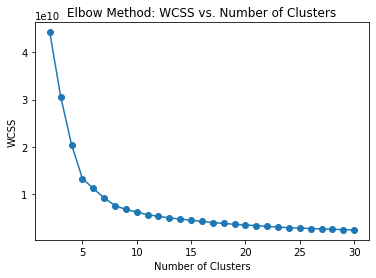

In [17]:
# Plot the WCSS values against the number of clusters
plt.plot(range(start_range, end_range + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method: WCSS vs. Number of Clusters')
plt.show()

In [26]:
#num_clusters = 14

In [36]:
#kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#kmeans.fit(X_scaled)

C:\Users\tanya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=42)

In [70]:
clusters = kmeans.labels_

In [32]:
wcss = []
for i in range(1, 14):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [34]:
sns.set()

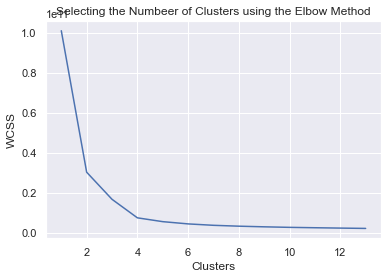

In [36]:
plt.plot(range(1, 14), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show() 

In [74]:
from sklearn.mixture import GaussianMixture

In [75]:
n_clusters = 5
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

GaussianMixture(n_components=4)

In [77]:
cluster_labels = gmm_model.predict(X)
Xa = pd.DataFrame(X)
Xa['cluster'] = cluster_labels

In [128]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X) 

KMeans(n_clusters=4, random_state=42)

In [129]:
cluster_labels = kmeans.predict(X) 
features['cluster'] = cluster_labels

C:\Users\ansh1\AppData\Local\Temp\ipykernel_4148\2752327799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['cluster'] = cluster_labels


In [130]:
features 

,Quantity,Price per Tire,Discount,GP$,name,season,CPI,employment_data,income_data_x,temp,dew,humidity,snow,icon,LATITUDE,LONGITUDE,cluster
0,1,196.99,0.00,49.88,Goodyear,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
1,4,105.99,0.00,139.32,Multi-Mile,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
2,2,209.42,0.00,103.36,Goodyear,all-weather,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
3,4,99.99,99.99,107.21,Non-Primary,none,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
4,1,178.54,0.00,41.59,Non-Primary,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184189,1,183.91,0.00,75.24,Multi-Mile,all-season,177.093,60.1,15064.1,28.5,8.1,42.8,0.0,partly-cloudy-day,42.574170,-71.280520,0
184190,2,76.99,0.00,68.34,Non-Primary,none,177.093,60.1,15064.1,28.5,8.1,42.8,0.0,partly-cloudy-day,42.574170,-71.280520,0
184191,2,57.99,0.00,38.36,Solar,all-season,152.700,57.8,19213.9,38.4,31.8,80.5,0.0,rain,42.574170,-71.280520,1
184192,4,295.06,40.00,150.44,Michelin,all-season,152.700,57.8,19213.9,38.4,31.8,80.5,0.0,rain,42.574170,-71.280520,1


In [131]:
clusters_obs.mean() 

,Quantity,Price per Tire,Discount,GP$,CPI,employment_data,income_data_x,temp,dew,humidity,snow,LATITUDE,LONGITUDE
cluster,,,,,,,,,,,,,
0,2.844680,161.075849,34.400943,112.840486,188.780423,59.964665,15161.560891,49.597950,37.937641,67.436027,0.102820,43.897849,-70.768569
1,2.887335,125.513986,39.379287,95.292568,152.700000,57.800000,19213.900000,36.757984,20.869697,57.049981,0.008178,43.839653,-70.640827
2,2.940344,142.262960,28.994038,106.370363,165.693549,58.613452,15633.537224,46.694941,36.769140,71.069071,0.196091,43.893719,-70.712574
3,2.849310,123.703319,17.608691,110.260954,153.557544,57.721228,16637.662576,37.579114,26.120074,66.631779,0.045685,43.923215,-70.580231


In [132]:
clusters_obs = features.groupby('cluster')
cluster_chara = clusters_obs['Quantity', 'Price per Tire', 'Discount','GP$', 'CPI', 'employment_data', 'income_data_x', 
                            'temp', 'dew', 'humidity', 'snow'].mean() 
cluster_chara 

C:\Users\ansh1\AppData\Local\Temp\ipykernel_4148\709446666.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_chara = clusters_obs['Quantity', 'Price per Tire', 'Discount','GP$', 'CPI', 'employment_data', 'income_data_x',


,Quantity,Price per Tire,Discount,GP$,CPI,employment_data,income_data_x,temp,dew,humidity,snow
cluster,,,,,,,,,,,
0,2.844680,161.075849,34.400943,112.840486,188.780423,59.964665,15161.560891,49.597950,37.937641,67.436027,0.102820
1,2.887335,125.513986,39.379287,95.292568,152.700000,57.800000,19213.900000,36.757984,20.869697,57.049981,0.008178
2,2.940344,142.262960,28.994038,106.370363,165.693549,58.613452,15633.537224,46.694941,36.769140,71.069071,0.196091
3,2.849310,123.703319,17.608691,110.260954,153.557544,57.721228,16637.662576,37.579114,26.120074,66.631779,0.045685


#### Cluster 0 has tires from which avg profit is highest and also whose price is high (per tire). We can also observe that tires from this cluster are purchased when CPI is high (prices have changed frequently), and also the employment rate is high
This could mean that people are willing to pay higher prices though median income was less, which could mean that people believe in the tire quality or performance or their own preferences(maybe they own premium cars). Discounts are offered are relatively higher though higest price which could mean certain incentives or programes must have taken place. This would need to be analyzed more. Also it could depend on temeprature as these tires are purchased when mean temperature was highest. 

#### Cluster 1 has tires from which least profit is made as it has a low price per tire with 125 dollars and offers most discount among other clusters. With the least CPI index, it indicates a prices have remained steady. These tires were purchased when the median income was high. The avg temperature was least at 36 degrees when this tires were purchased. Also to notice, dew and humidity are very less for this cluster, which could indicate customers with low moisture and humidity. Least snow. 

It seems that customers in Cluster 1 are value-conscious, lower-priced tires and taking advantage of the higher discounts offered. Despite the lower price, these tires are being purchased by customers with higher median incomes. The preference for these tires could be influenced by factors such as lower temperatures and lower levels of dew and humidity, indicating a potential focus on specific weather or road conditions. 

#### Cluster 2 has tires where fair profit is made with slightly high price. With good discounts offered, these tires are profitable. Again, these tires are purchased when temperature is high and when humidity is the highest and also where snow is highest among all clusters. 
Hence, these are moderate performance tires offered at slightly higher prices where temperature, humidity and snow fall play a good role in determining customer segments. 

#### Cluster 3 are tires which are least priced with avg price per tire being 124 dollars. These tires offers least discounts and are very profitable. These tires have been purchased when the income was moderate and employment rate was slightly lower than tires in other segments. Again, there are moderate weather conditions. 
It seems to represents a segment of customers who prioritize lower-priced tires. Despite offering the least amount of discount, these tires are highly profitable. The moderate income level and slightly lower employment rate suggest that this cluster may consist of cost-conscious customers who prioritize value for money. The moderate weather conditions indicate that these tires are suitable for a range of climates.

#### The locations where tires from clusters are sold most is plotted below.  

<AxesSubplot:xlabel='cluster'>

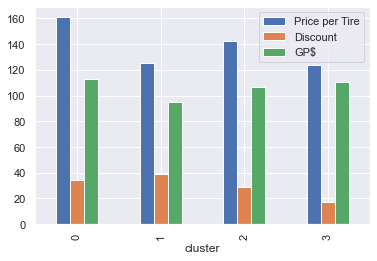

In [153]:
cluster_chara[['Price per Tire', 'Discount', 'GP$']].plot(kind='bar')

<AxesSubplot:xlabel='cluster'>

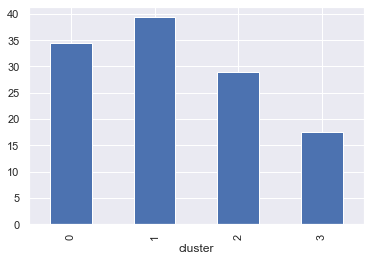

In [133]:
features 

,Quantity,Price per Tire,Discount,GP$,name,season,CPI,employment_data,income_data_x,temp,dew,humidity,snow,icon,LATITUDE,LONGITUDE,cluster
0,1,196.99,0.00,49.88,Goodyear,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
1,4,105.99,0.00,139.32,Multi-Mile,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
2,2,209.42,0.00,103.36,Goodyear,all-weather,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
3,4,99.99,99.99,107.21,Non-Primary,none,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
4,1,178.54,0.00,41.59,Non-Primary,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184189,1,183.91,0.00,75.24,Multi-Mile,all-season,177.093,60.1,15064.1,28.5,8.1,42.8,0.0,partly-cloudy-day,42.574170,-71.280520,0
184190,2,76.99,0.00,68.34,Non-Primary,none,177.093,60.1,15064.1,28.5,8.1,42.8,0.0,partly-cloudy-day,42.574170,-71.280520,0
184191,2,57.99,0.00,38.36,Solar,all-season,152.700,57.8,19213.9,38.4,31.8,80.5,0.0,rain,42.574170,-71.280520,1
184192,4,295.06,40.00,150.44,Michelin,all-season,152.700,57.8,19213.9,38.4,31.8,80.5,0.0,rain,42.574170,-71.280520,1


In [1]:
map = folium.Map(location=[features['LATITUDE'].mean(), features['LATITUDE'].mean()], zoom_start=10) 

NameError: name 'folium' is not defined

In [134]:
features

,Quantity,Price per Tire,Discount,GP$,name,season,CPI,employment_data,income_data_x,temp,dew,humidity,snow,icon,LATITUDE,LONGITUDE,cluster
0,1,196.99,0.00,49.88,Goodyear,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
1,4,105.99,0.00,139.32,Multi-Mile,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
2,2,209.42,0.00,103.36,Goodyear,all-weather,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
3,4,99.99,99.99,107.21,Non-Primary,none,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
4,1,178.54,0.00,41.59,Non-Primary,all-season,204.009,60.2,15590.8,42.4,40.7,93.8,1.3,snow,43.410838,-70.741684,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184189,1,183.91,0.00,75.24,Multi-Mile,all-season,177.093,60.1,15064.1,28.5,8.1,42.8,0.0,partly-cloudy-day,42.574170,-71.280520,0
184190,2,76.99,0.00,68.34,Non-Primary,none,177.093,60.1,15064.1,28.5,8.1,42.8,0.0,partly-cloudy-day,42.574170,-71.280520,0
184191,2,57.99,0.00,38.36,Solar,all-season,152.700,57.8,19213.9,38.4,31.8,80.5,0.0,rain,42.574170,-71.280520,1
184192,4,295.06,40.00,150.44,Michelin,all-season,152.700,57.8,19213.9,38.4,31.8,80.5,0.0,rain,42.574170,-71.280520,1


In [136]:
import folium 

In [137]:
range(0,4)

range(0, 4)

In [142]:
sample_size_per_cluster = 100

# Create a map centered on a specific location
map_clusters = folium.Map(location=[43.82, -70.76], zoom_start=5)
cluster_colors = ['red', 'blue', 'green', 'yellow']

# Plot clusters on the map
for cluster_label in range(4):
    cluster_data = features[features['cluster'] == cluster_label]
    
    # Sample data points from the cluster
    cluster_sample = cluster_data.sample(n=sample_size_per_cluster, random_state=42)
    
    cluster_color = cluster_colors[cluster_label % len(cluster_colors)]
    
    for index, row in cluster_sample.iterrows():
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=5,
            color=cluster_color,
            fill=True,
            fill_color=cluster_color,
            fill_opacity=0.6,
            popup=f"Cluster {cluster_label}"
        ).add_to(map_clusters)

# Display the map
map_clusters

In [154]:
cluster_0 = features[features['cluster'] == 0]

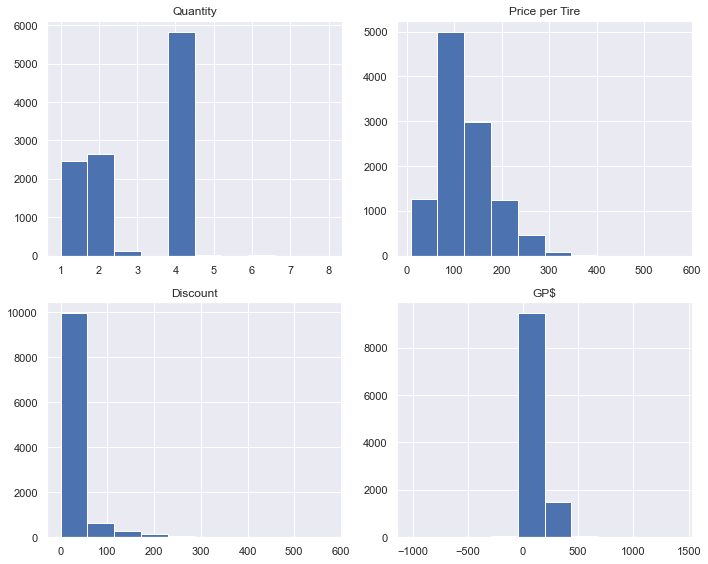

In [162]:
features_of_interest = ['Quantity', 'Price per Tire', 'Discount', 'GP$']

# Create subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features_of_interest):
    axes[i].hist(cluster_data[feature], bins=10)
    axes[i].set_title(feature)

plt.tight_layout()
plt.show() 

In [163]:
from scipy.stats import f_oneway

# Select the feature of interest
feature_of_interest = 'Price per Tire'

# Perform ANOVA test across clusters
grouped_data = features.groupby('cluster')[feature_of_interest].apply(list)
f_statistic, p_value = f_oneway(*grouped_data)

# Print ANOVA results
print("ANOVA Results:")
print(f"Feature: {feature_of_interest}")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

ANOVA Results:
Feature: Price per Tire
F-statistic: 1898.7280596940345
p-value: 0.0


In [177]:
cluster_0['name'].value_counts(normalize=True)*100 

Non-Primary    25.391582
Multi-Mile     22.230495
Goodyear       14.256705
Sumitomo        8.512597
Solar           8.270270
Falken          6.024341
Vanderbilt      5.726508
Michelin        5.389416
BF Goodrich     4.198086
Name: name, dtype: float64

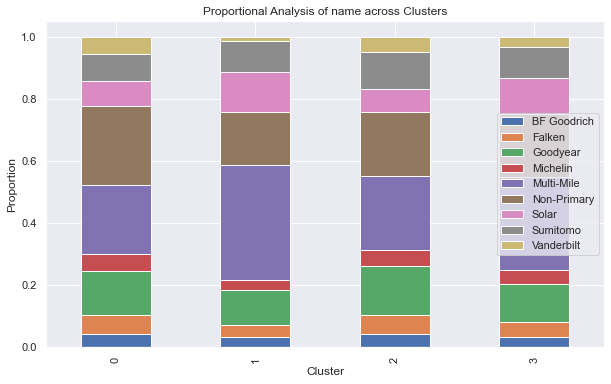

In [178]:

cluster_proportions = features.groupby('cluster')['name'].value_counts(normalize=True).unstack()

# Plot the proportions for each cluster
cluster_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title to the plot
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.title(f'Proportional Analysis of {categorical_variable} across Clusters')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [180]:
from scipy.stats import chi2_contingency

# Select the categorical variable of interest
categorical_variable = 'name'

# Perform chi-square test for each cluster
for cluster_label in features['cluster'].unique():
    # Filter the data for the current cluster
    cluster_data = features[features['cluster'] == cluster_label]
    
    # Create a cross-tabulation table
    cross_tab = pd.crosstab(cluster_data[categorical_variable], cluster_data['cluster'])
    
    # Perform the chi-square test
    chi2, p_value, _, _ = chi2_contingency(cross_tab)
    
    # Print the chi-square test results
    print(f"Cluster {cluster_label}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()

Cluster 2:
Chi-Square Statistic: 0.0
P-value: 1.0

Cluster 0:
Chi-Square Statistic: 0.0
P-value: 1.0

Cluster 3:
Chi-Square Statistic: 0.0
P-value: 1.0

Cluster 1:
Chi-Square Statistic: 0.0
P-value: 1.0



In [181]:
## No relationship between brand and cluster 

In [214]:
cluster_0.corr()

,Quantity,Price per Tire,Discount,GP$,CPI,employment_data,income_data_x,temp,dew,humidity,snow,LATITUDE,LONGITUDE,cluster
Quantity,1.000000,0.212257,0.380254,0.511862,0.067595,0.000417,0.114562,-0.083303,-0.068702,0.021931,0.028166,0.014364,-0.045607,NaN
Price per Tire,0.212257,1.000000,0.267826,0.409535,0.106229,0.055017,0.096676,0.001725,0.015278,0.043564,0.011033,-0.006905,-0.028938,NaN
Discount,0.380254,0.267826,1.000000,-0.229924,0.070183,0.001969,0.012810,0.019652,0.027214,0.031035,-0.012902,0.004672,-0.006957,NaN
GP$,0.511862,0.409535,-0.229924,1.000000,0.061432,0.022185,0.110743,-0.060598,-0.052753,0.008871,0.036784,0.020392,-0.041480,NaN
CPI,0.067595,0.106229,0.070183,0.061432,1.000000,0.579124,0.667312,0.336364,0.377726,0.242046,0.024739,0.016975,-0.018303,NaN
employment_data,0.000417,0.055017,0.001969,0.022185,0.579124,1.000000,0.241959,0.332778,0.354424,0.190078,0.039624,0.002857,-0.009808,NaN
income_data_x,0.114562,0.096676,0.012810,0.110743,0.667312,0.241959,1.000000,-0.339600,-0.241767,0.175360,0.121690,-0.013186,-0.020373,NaN
temp,-0.083303,0.001725,0.019652,-0.060598,0.336364,0.332778,-0.339600,1.000000,0.949393,0.201632,-0.165656,-0.009439,0.002551,NaN
dew,-0.068702,0.015278,0.027214,-0.052753,0.377726,0.354424,-0.241767,0.949393,1.000000,0.494411,-0.107340,0.001914,0.005071,NaN
humidity,0.021931,0.043564,0.031035,0.008871,0.242046,0.190078,0.175360,0.201632,0.494411,1.000000,0.151289,0.025982,0.000159,NaN


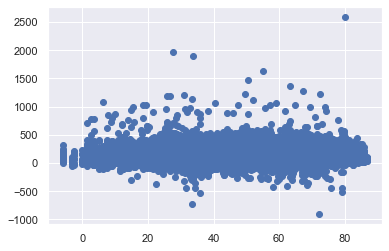

In [208]:
plt.scatter(cluster_0['temp'], cluster_0['GP$'])
plt.show()

<AxesSubplot:>

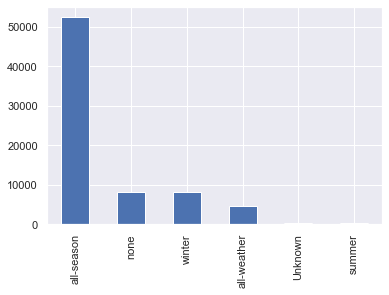

In [203]:
cluster_0['season'].value_counts().plot(kind='bar')

In [216]:
from pandas.plotting import scatter_matrix

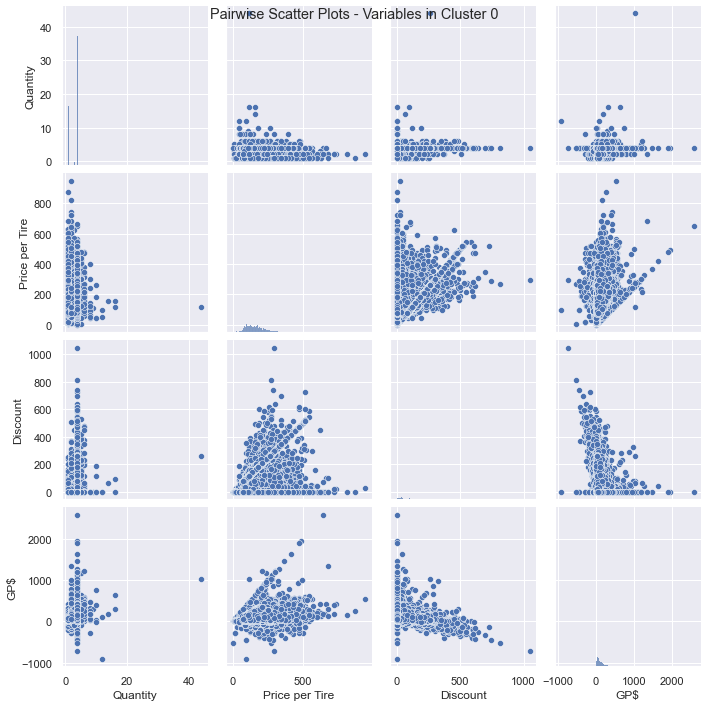

In [219]:
variables_to_plot = cluster_0[['Quantity', 'Price per Tire', 'Discount', 'GP$']]

# Create pairwise scatter plots
sns.pairplot(variables_to_plot)
plt.suptitle('Pairwise Scatter Plots - Variables in Cluster 0')
plt.show()

In [2]:
feature.column()

NameError: name 'feature' is not defined